

# Project: Investigate a Patients Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is a dataset for patients showing up information, and many other patients information.


In [154]:

%matplotlib inline
import pandas as p 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [148]:

df= p.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [149]:

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no null records

In [81]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


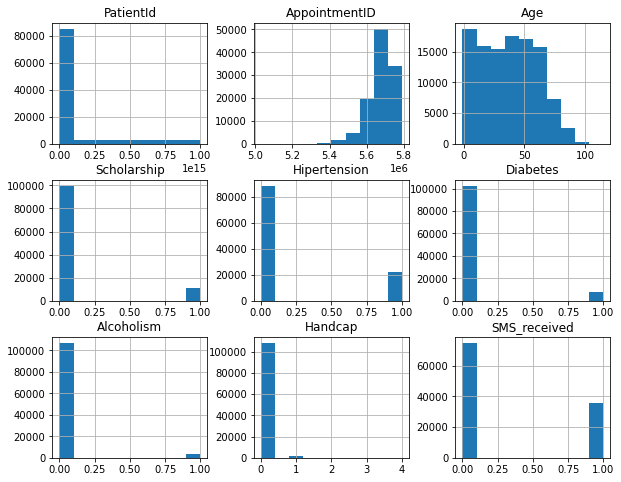

In [144]:
df.hist(figsize=(10,8));



### Data Cleaning 

columns like id and original_title don't have meaning in statistics, so I am going to drop them

In [150]:

df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


we can see there are no null values in the column

I have faced an error when trying to run the code: 
shown= df.query('No-show=="No"') 

error: 
UndefinedVariableError: name 'No' is not defined

then I tried 

shown= df.query('No-show=="Yes"')

and I have got the same error, so I understood that the issue is in the column name.

I have tried the following code, and it succeeded. 
shown= df.query('Neighbourhood=="JARDIM DA PENHA"')

That is why I am going to replace the hyphen in column names with _


Note: I have not used "shown" afterwards, but it helped me figure out the issue in the column name

I have got the code to replace all column names from the following site. 
And also I am making the letters lowercase, so it will be easier to remember.
https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd

In [151]:
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')

In [152]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Is the fact of not showing dependent on the gender?

In [156]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

There are two values for No_show yes, and No 
and this will be our dependent variable

In [92]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


i have created a frequency table, to represent a relationship between two categorical variables 
as I have seen in this url
https://www.pluralsight.com/guides/finding-relationships-data-with-python

In [157]:
p.crosstab(df.gender, df.no_show)

no_show,No,Yes
gender,,
F,57246,14594
M,30962,7725


I have checked how to add the labels to the plot in 
https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

Text(0, 0.5, 'number of patients')

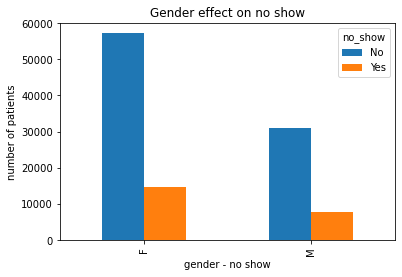

In [158]:
ax1=p.crosstab(df.gender, df.no_show).plot(kind='bar',title='Gender effect on no show');

ax1.set_xlabel("gender - no show")
ax1.set_ylabel("number of patients")

I have got the percentage for the females and males that did not show
https://stackoverflow.com/questions/53690279/pandas-percentage-count-of-categorical-variable

In [160]:
df.groupby('gender').no_show.apply(lambda x: (x == "Yes").mean())

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64

It means that the female patients did not show a little bit more, on average

I have tried to find the correlation between gender and no_show using the below url
I have done the chi-squared test
https://www.pluralsight.com/guides/finding-relationships-data-with-python

In [161]:
chi2_contingency(p.crosstab(df.gender, df.no_show))

(1.8534369792394627,
 0.17338418189785987,
 1,
 array([[57333.16492803, 14506.83507197],
        [30874.83507197,  7812.16492803]]))

The p value is 0.17338418189785987, it is the measure of correlation, so there is a weak relatiosnhip between both variables

### Is the fact of not coming dependent on the fact if the patient received an sms or not?

In [98]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [162]:
df['sms_received'].value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

sms_received is an independent variable

In [163]:
p.crosstab(df.sms_received, df.no_show)

no_show,No,Yes
sms_received,,
0,62510,12535
1,25698,9784


Text(0, 0.5, 'number of patients')

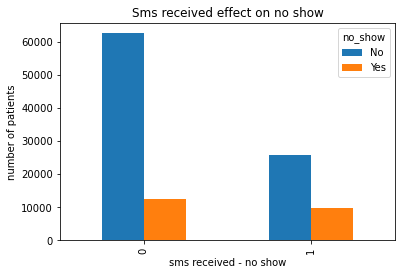

In [164]:
ax=p.crosstab(df.sms_received, df.no_show).plot(kind='bar',title='Sms received effect on no show');

ax.set_xlabel("sms received - no show")
ax.set_ylabel("number of patients")

In [165]:
df.groupby('sms_received').no_show.apply(lambda x: (x == "Yes").mean())

sms_received
0    0.167033
1    0.275745
Name: no_show, dtype: float64

The chi-squared test for sms_received and no_show

In [166]:
chi2_contingency(p.crosstab(df.sms_received, df.no_show))

(1766.0676572637585,
 0.0,
 1,
 array([[59890.97107494, 15154.02892506],
        [28317.02892506,  7164.97107494]]))

The P value is 0.0 which means the two variables are independent

### Is the fact of not coming dependent on age?


In [124]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I have check how to divide the data into bins in 
https://www.absentdata.com/pandas/pandas-cut-continuous-to-categorical/amp/

In [167]:
category = p.cut(df.age,bins=[0,2,17,65,99],labels=['Toddler/baby','Child','Adult','Elderly'])
df.insert(4,'age_group',category)

In [168]:
df.head()

,gender,scheduledday,appointmentday,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,Adult,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,Adult,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,Adult,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,Child,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,Adult,JARDIM DA PENHA,0,1,1,0,0,0,No


In [169]:
df['age_group'].value_counts()

Adult           69846
Child           19949
Elderly         13290
Toddler/baby     3891
Name: age_group, dtype: int64

In [170]:
p.crosstab(df.age_group, df.no_show)

no_show,No,Yes
age_group,,
Toddler/baby,3224,667
Child,15258,4691
Adult,55590,14256
Elderly,11227,2063


We can see that the biggest number of patients who did not come fall under the adult category.

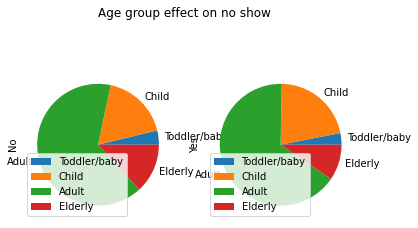

In [173]:
p.crosstab(df.age_group, df.no_show).plot(kind='pie',title='Age group effect on no show', subplots=True);


In [174]:
df.groupby('age_group').no_show.apply(lambda x: (x == "Yes").mean())

age_group
Toddler/baby    0.171421
Child           0.235150
Adult           0.204106
Elderly         0.155229
Name: no_show, dtype: float64

Even though the patients who are adults did not show more than the other groups, but the mean of not showing is not that much 
bigger than the other age groups.

The chi-squared test for age_group and no_show

In [175]:
chi2_contingency(p.crosstab(df.age_group, df.no_show))

(339.77490151420864,
 2.441326628669742e-73,
 3,
 array([[ 3102.55018883,   788.44981117],
        [15906.64963169,  4042.35036831],
        [55692.80917215, 14153.19082785],
        [10596.99100733,  2693.00899267]]))

The p value is very small, so it means the two variables are independent.

<a id='conclusions'></a>
## Conclusions


The fact of not showing is not depending on gender in a strong way, because the percentage of females and males who 
have not shown is almost the same, and also the correlation was weak.

Surprisingly but the fact of not showing is independent of the fact that the patient received an sms

The fact of not showing is independent of the age

In [178]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1